In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plot
import cv2
from sklearn.utils import shuffle

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("A_Z Handwritten Data.csv")
data

In [ ]:
X = data.drop('0',axis = 1)
y = data['0']

In [ ]:
img = X.T[0]

In [ ]:
img = np.array(img)

In [ ]:
img_reshaped = img.reshape((28, 28))

In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

Text(0.5, 1.0, 'A')

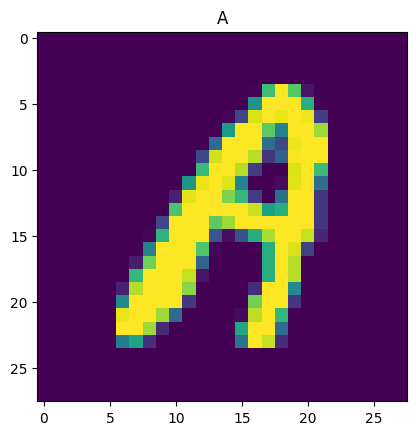

In [ ]:
plot.imshow(img_reshaped)
plot.title(word_dict[y[0]])

In [ ]:
train_size = int(len(X) * 0.7)
test_size = int(len(X) * 0.2)
validation_size = int(len(X) * 0.1)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


C:\Users\user\AppData\Local\Temp\ipykernel_7876\1114540695.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  y_int = np.int0(y)


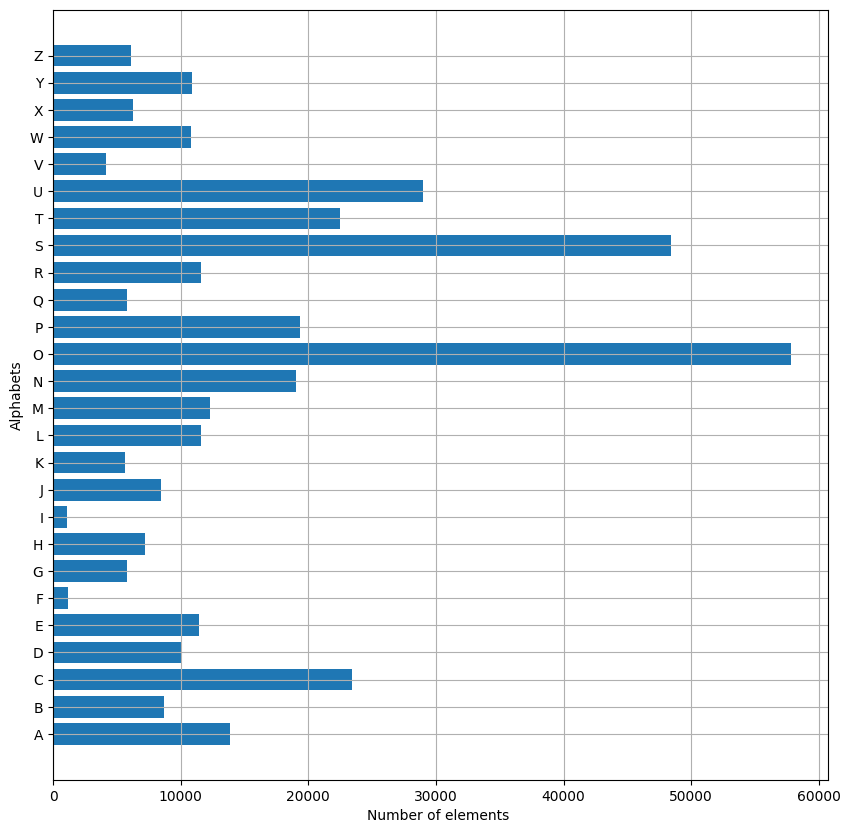

In [ ]:
y_int = np.int0(y)

count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plot.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plot.xlabel("Number of elements ")
plot.ylabel("Alphabets")
plot.grid()
plot.show()

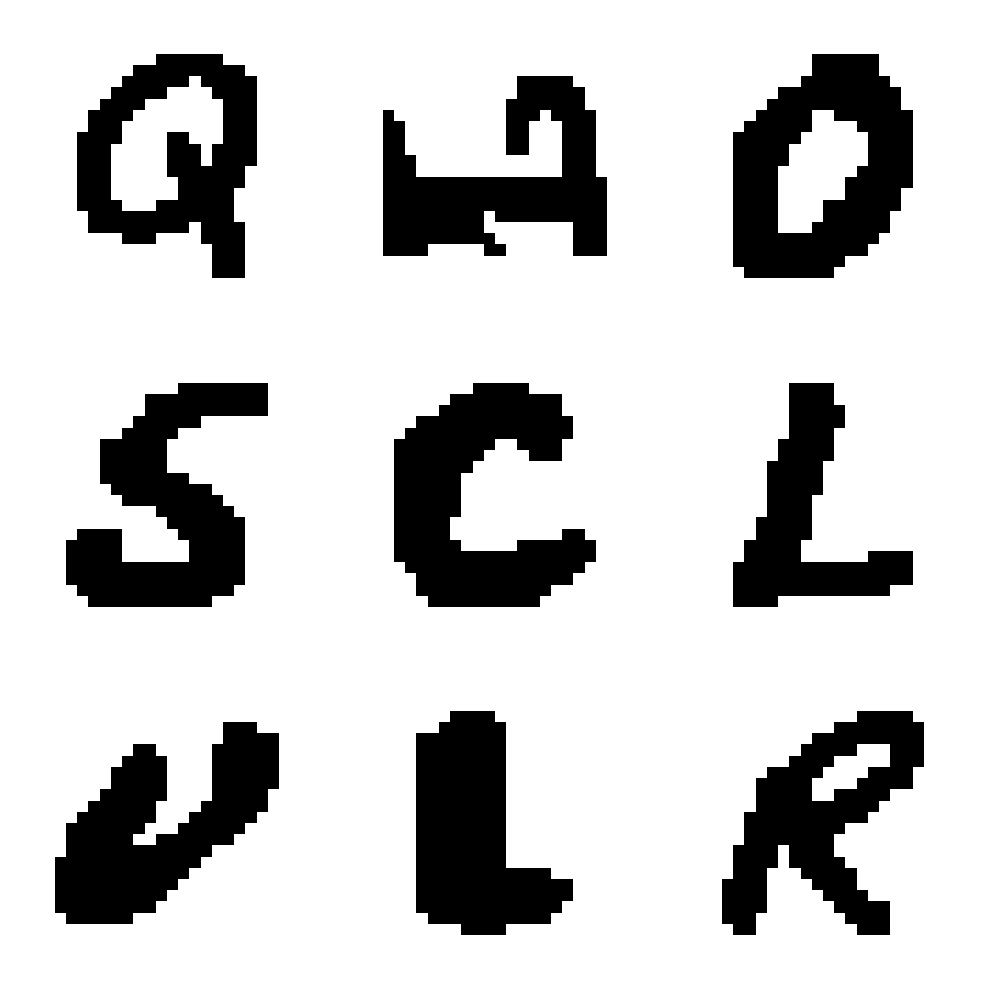

In [ ]:
# Assuming train_x is a numpy array of shape (n_samples, 28, 28)
# Shuffle the first 100 samples of train_x
shuff = shuffle(train_x[:100])

# Create a 3x3 grid for displaying images
fig, ax = plot.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()

# Loop through the first 9 shuffled samples
for i in range(9):
    # Apply a binary threshold using numpy
    shu = np.where(shuff[i] > 30, 200, 0)
    # Display the thresholded image
    axes[i].imshow(shu, cmap="Greys")
    axes[i].axis('off')  # Hide the axes for better visualization

# Show the plot
plot.tight_layout()
plot.show()

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [ ]:
train_yOHE = to_categorical(train_y, num_classes = 26)
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26)
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
train_yOHE = np.int32(train_yOHE)
test_yOHE = np.int32(test_yOHE)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,178 (535.85 KB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 208s 22ms/step - accuracy: 0.9060 - loss: 0.4009 - val_accuracy: 0.9761 - val_loss: 0.0866


In [ ]:
model.summary()
model.save(r'model_hand1.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,536 (1.57 MB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,358 (1.05 MB)

In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9760907292366028]
The training accuracy is : [0.954574465751648]
The validation loss is : [0.08663453161716461]
The training loss is : [0.16804789006710052]


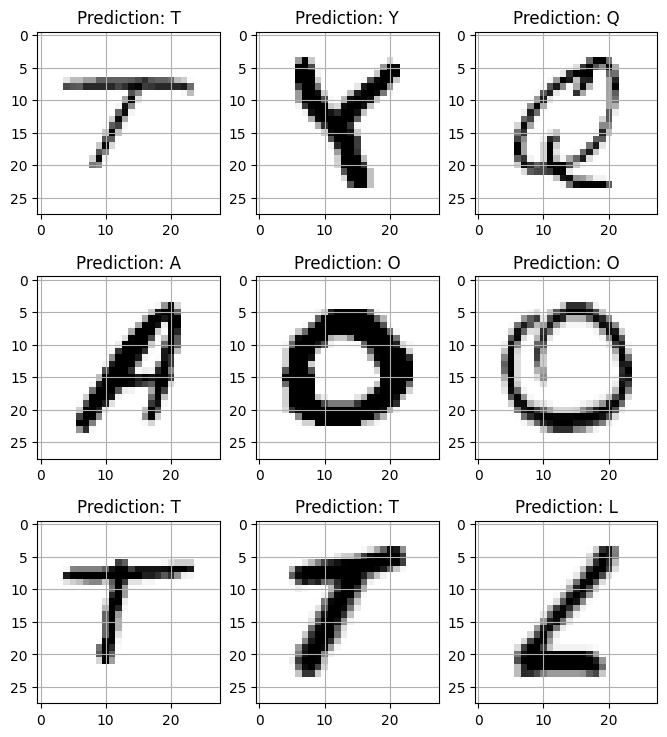

In [ ]:
fig, axes = plot.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
path = 'IMG5.png'
img = cv2.imread(rf"{path}")
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (28,28))

In [ ]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [ ]:
# Assuming img_final is your preprocessed image and model is your trained model
predictions = model.predict(img_final)

# Get the indices of the top 3 predictions
top_indices = np.argsort(predictions[0])[-5:][::-1]  # Sort and get the last 3 in descending order

# Get the top 3 predictions
top_values = predictions[0][top_indices]

# Display the top 3 predictions
for i, index in enumerate(top_indices):
    print(f"Top {i+1} Prediction: Index = {index}, with probabilitie value = {top_values[i]}  of the alphabet '{word_dict[index]}'")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Top 1 Prediction: Index = 1, with probabilitie value = 0.9975950121879578  of the alphabet 'B'
Top 2 Prediction: Index = 4, with probabilitie value = 0.002350777853280306  of the alphabet 'E'
Top 3 Prediction: Index = 25, with probabilitie value = 2.379677061981056e-05  of the alphabet 'Z'
Top 4 Prediction: Index = 15, with probabilitie value = 1.277343926631147e-05  of the alphabet 'P'
Top 5 Prediction: Index = 17, with probabilitie value = 5.5428840823879e-06  of the alphabet 'R'


In [ ]:
# img_pred = word_dict[np.argmax(model.predict(img_final))]

# cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
# cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
# cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

In [ ]:
# Assuming img_final is your preprocessed image and model is your trained model
predictions = model.predict(img_final)
img_pred = word_dict[np.argmax(predictions)]

# # Load the image where you want to display the prediction
# img = cv2.imread(path)

# # Check if the image is loaded correctly
# if img is None:
#     raise FileNotFoundError(f"Image not found at {path}")

# # Add text to the image
# cv2.putText(img, "Dataflair _ _ _ ", (20, 25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, (0, 0, 230), 2)
# cv2.putText(img, "Prediction: " + img_pred, (20, 410), cv2.FONT_HERSHEY_DUPLEX, 1.3, (255, 0, 30), 2)

img_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


'B'

In [ ]:
# # Display the image
# cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)
# cv2.waitKey(0)  # Wait for a key press to close the window
# cv2.destroyAllWindows()  # Close the window

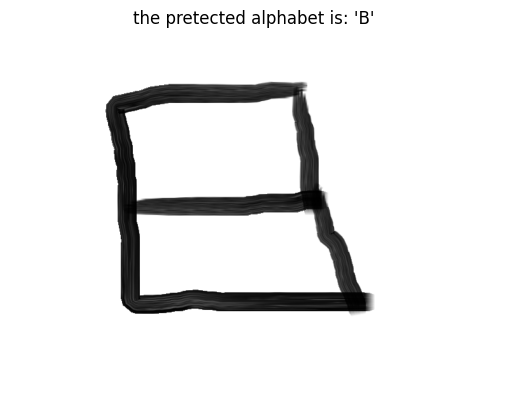

In [ ]:

# Load and display an image with its label
photo = plot.imread(path)  # Replace with the actual path to your image
label = f"the pretected alphabet is: '{img_pred}'"  # Replace with the actual label

plot.imshow(photo)
plot.axis('off')  # Hide axes
plot.title(label)  # Set the title to display the label
plot.show()